In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def get_esp(s):
    gaussian_dict = {25.077: 0.125, 13.285: 0.25, 7.032: 0.5, 3.731: 1, 1.994: 2, 1.081: 4, 0.6: 8, 0.344: 16}
    fl_dict = {
        382.3: 0.125,
        106.1: 0.25, 
        29.4: 0.5,
        8.19: 1,
        2.32: 2,
        0.671: 4,
        0.2036:	8,
        0.067: 16
    }
    if s['setting'] == 'fl':
        return fl_dict[s['skellam_mu']]
    else:
        return gaussian_dict[s['sigma']]
all_df = pd.read_csv("pca_results.csv")


In [8]:
all_df.drop_duplicates(inplace=True)
all_df = all_df.drop(all_df[(all_df['setting']!='fl')&(all_df['sigma']==10000.0)].index)

In [9]:

all_df['eps'] = all_df.apply(get_esp,axis=1)

## Generate the comparision between different settings under the same eps

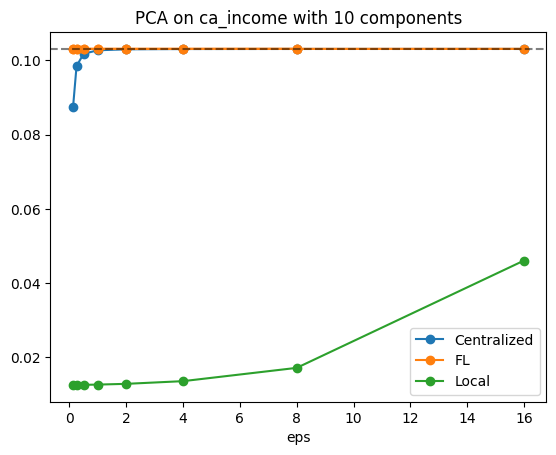

In [46]:
dataset = 'ca_income'
num_c = 10 # chose from [10,25,50,100,125,250,500,1000]

cond0 = (all_df["dataset"] ==dataset)
cond3 = (all_df["num_components"] == num_c)

test_df = all_df[cond0 & cond3]

fig, ax = plt.subplots()
test_df.groupby("setting").plot(x="eps", y="q_f", marker="o",ax=ax)
ax.legend(["Centralized","FL","Local"])
ax.set_title(f"PCA on {dataset} with {num_c} components")
ax.axhline(test_df["q_clean"].values[0],color='black',linestyle='--',label='clean',alpha=0.5)
# sns.lineplot(x="eps", y="q_f", data=test_df, markers=True,hue="setting")
# sns.lineplot(x="eps", y="q_clean", data=test_df, markers=True,linestyle='--',color='black',label='clean')


In [ ]:
dataset = 'ca_income'
num_c = 10 # chose from [10,25,50,100,125,250,500,1000]

cond0 = (all_df["dataset"] ==dataset)
cond3 = (all_df["num_components"] == num_c)
con2 = (all_df["setting"] == 'fl')
test_df = all_df[cond0 & cond3 & con2]

fig, ax = plt.subplots()
test_df.groupby("b").plot(x="eps", y="q_f", marker="o",ax=ax)
# ax.legend(["Centralized","FL","Local"])
ax.set_title(f"PCA on {dataset} with {num_c} components")
ax.axhline(test_df["q_clean"].values[0],color='black',linestyle='--',label='clean',alpha=0.5)
# sns.lineplot(x="eps", y="q_f", data=test_df, markers=True,hue="setting")
# sns.lineplot(x="eps", y="q_clean", data=test_df, markers=True,linestyle='--',color='black',label='clean')
